<div class="title">
  <h1>Machine Learning I: Fractal 2</h1>
  <h3>Programming Assignment</h3>
  <h5><small>Submitted by</small>Debonil Ghosh (M21AIE225)</h5>
</div>
<hr>

### Question 1:
 Implement the k-means and spectral clustering algorithms for clustering the points given in the datasets:
http://cs.joensuu.fi/sipu/datasets/jain.txt. Plot the obtained results. In order to evaluate the
performance of these algorithms, find the percentage of points for which the estimated cluster label is
correct. Report the accuracy of both the algorithm. The ground truth clustering is given as the third
column of the given text file. [15 Marks]


In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})

- KMeans Cluster From Scratch

In [246]:
class KMeans:
    def __init__(self, n_clusters=2, tollerance=0.1, max_iter=5):
        self.k = n_clusters
        self.tollerance = tollerance
        self.max_iter = max_iter
    
    def fit_predict(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureIndex, featureset in enumerate(data):
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureIndex)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(data[self.classifications[classification]],axis=0)

            optimized = True

            for c in self.centroids:
                centroid_shift = np.sum((self.centroids[c]-prev_centroids[c])/prev_centroids[c]*100.0)
                if centroid_shift > self.tollerance:
                    optimized = False

            if optimized:
                break
        
        predictions = np.empty([len(data)])
        for classification in self.classifications:
            predictions[self.classifications[classification]]=classification
        return predictions


- Utility function for confusion Matrix And Accuracy Report

In [247]:

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})


def confusionMatrixAndAccuracyReport(Y_test, Y_pred):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = np.trace(cm)/sum(cm.flatten())

    classwiseAccuracy = np.zeros(len(cm))
    for n in range(len(cm)):
        for i in range(len(cm)):
            for j in range(len(cm)):
                if (i != n and j != n) or (i == n and j == n):
                    classwiseAccuracy[n] += cm[i][j]

    classwiseAccuracy /= sum(cm.flatten())

    plt.figure(figsize=(6, 6))
    plt.title('Accuracy Score: {0:3.3f}'.format(overallAccuracy), size=12)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues')

    plt.show()
    print('Overall Accuracy Score: {0:3.3f}'.format(overallAccuracy))
    print('Classwise Accuracy Score: {0}'.format(classwiseAccuracy))


- Data load

In [248]:
data = pd.read_csv('data-ques-1/jain.txt',sep='\t',names=['X','Y','Class'])
x=data.drop('Class',axis=1)
data['Class'] = data['Class']-1
data.head()

,X,Y,Class
0,0.85,17.45,1
1,0.75,15.60,1
2,3.30,15.45,1
3,5.25,14.20,1
4,4.90,15.65,1


- Visualize Acutal Data

<AxesSubplot:xlabel='X', ylabel='Y'>

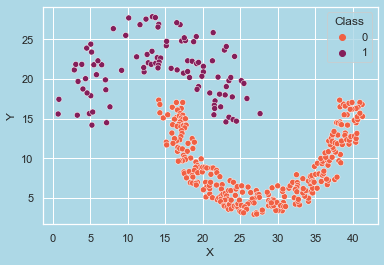

In [249]:
sns.scatterplot(data = data , x = 'X',y = 'Y' , hue = 'Class',  palette= 'rocket_r' )

#### Applied KMeans Clustering

<AxesSubplot:xlabel='X', ylabel='Y'>

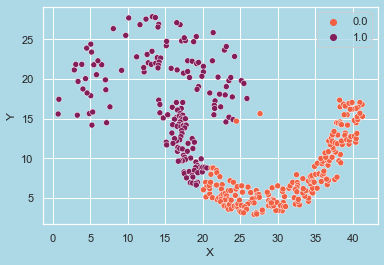

In [250]:
#from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
pred = kmeans.fit_predict(x.values)
pred=(pred+1)%2
sns.scatterplot(data = data , x = 'X',y = 'Y' , hue = pred,  palette= 'rocket_r' )


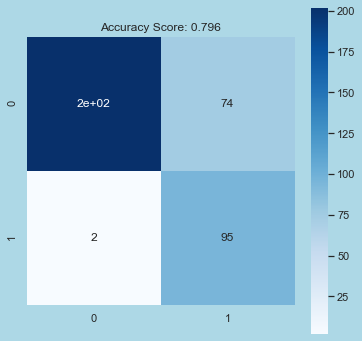

Overall Accuracy Score: 0.796
Classwise Accuracy Score: [0.79624665 0.79624665]


In [251]:

confusionMatrixAndAccuracyReport(data['Class'], pred)

#### Applied SpectralClustering

<AxesSubplot:xlabel='X', ylabel='Y'>

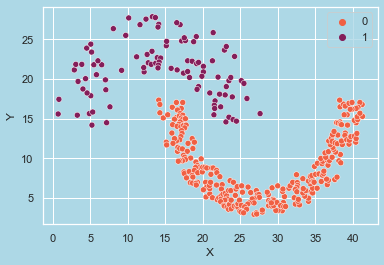

In [254]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2)

pred = model.fit_predict(x)

sns.scatterplot(data = data , x = 'X',y = 'Y' , hue = pred,  palette= 'rocket_r' )

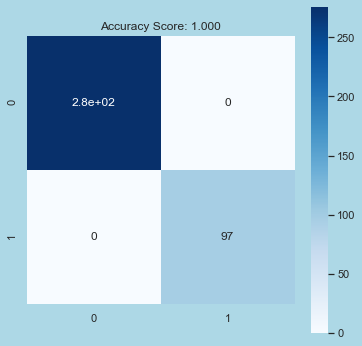

Overall Accuracy Score: 1.000
Classwise Accuracy Score: [1. 1.]


In [255]:
confusionMatrixAndAccuracyReport(data['Class'], pred)

<hr>